In [243]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [244]:
data18 = pd.read_csv('/content/drive/MyDrive/Final Election Project/Complete 2018.csv')
data24 = pd.read_csv('/content/drive/MyDrive/Final Election Project/Election 2024.csv')

In [245]:
desire_col = ['constituency_number', 'province', 'candidate_name','candidate_party','voter_reg','outcome']
data18 = data18[desire_col]

In [246]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3223 entries, 0 to 3222
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   constituency_number  3223 non-null   object
 1   province             3223 non-null   object
 2   candidate_name       3223 non-null   object
 3   candidate_party      3223 non-null   object
 4   voter_reg            3223 non-null   int64 
 5   outcome              3222 non-null   object
dtypes: int64(1), object(5)
memory usage: 151.2+ KB


In [247]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
encoder = LabelEncoder()
scalar = StandardScaler()

In [248]:
data18['constituency_number'] = encoder.fit_transform(data18['constituency_number'])
data18['province'] = encoder.fit_transform(data18['province'])
data18['candidate_party'] = encoder.fit_transform(data18['candidate_party'])
data18['outcome'] = encoder.fit_transform(data18['outcome'])

data24['constituency_number'] = encoder.fit_transform(data24['constituency_number'])
data24['province'] = encoder.fit_transform(data24['province'])
data24['candidate_party'] = encoder.fit_transform(data24['candidate_party'])

In [249]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [250]:
combined_data = pd.concat([data18, data24], ignore_index=True)

In [251]:
max_words = 1500
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(combined_data['candidate_name'])
sequences = tokenizer.texts_to_sequences(combined_data['candidate_name'])
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
padded_df = pd.DataFrame(padded_sequences, columns=[f'word_{i}' for i in range(1, max_sequence_length + 1)])
combined_data = pd.concat([combined_data, padded_df], axis=1).drop('candidate_name', axis=1)

In [252]:
data18_recovered = combined_data.iloc[:len(data18)].copy()

data24_recovered = combined_data.iloc[len(data18):].copy()

In [253]:
data18_recovered

,constituency_number,province,candidate_party,voter_reg,outcome,NAME OF CONSTITUENCY,word_1,word_2,word_3,word_4,word_5,word_6,word_7
0,0,2,30,131681,2.0,NaN,330,9,74,939,0,0,0
1,0,2,56,131681,1.0,NaN,9,154,0,0,0,0,0
2,0,2,48,131681,1.0,NaN,57,3,0,0,0,0,0
3,0,2,39,131681,1.0,NaN,119,92,42,0,0,0,0
4,0,2,4,131681,1.0,NaN,940,16,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,192,0,56,183975,1.0,NaN,4,6,523,0,0,0,0
3219,192,0,15,183975,1.0,NaN,4,103,0,0,0,0,0
3220,192,0,15,183975,1.0,NaN,181,6,0,0,0,0,0
3221,192,0,15,183975,1.0,NaN,165,116,0,0,0,0,0


In [254]:
X = data18_recovered[['constituency_number', 'province', 'candidate_party', 'voter_reg'] + [f'word_{i}' for i in range(1, max_sequence_length + 1)]]
y = data18_recovered['outcome']

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
from sklearn.linear_model import LinearRegression

In [257]:
model = LinearRegression()

In [258]:
model.fit(X_train, y_train)

LinearRegression()

In [259]:
from sklearn.metrics import accuracy_score,f1_score
y_pred = model.predict(X_test)

In [260]:
threshold = 0.5

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > threshold).astype(int)

# Ensure y_test is binary
y_test_binary = (y_test > threshold).astype(int)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
F1 Score: 1.00


In [261]:
data24_recovered = data24_recovered.drop('outcome' , axis=1)

In [262]:
data24_recovered

,constituency_number,province,candidate_party,voter_reg,NAME OF CONSTITUENCY,word_1,word_2,word_3,word_4,word_5,word_6,word_7
3223,0,2,15,515935,Chitral Upper-cum-Chitral Lower,1,882,0,0,0,0,0
3224,0,2,6,515935,Chitral Upper-cum-Chitral Lower,2,738,94,0,0,0,0
3225,0,2,0,515935,Chitral Upper-cum-Chitral Lower,803,276,0,0,0,0,0
3226,0,2,13,515935,Chitral Upper-cum-Chitral Lower,119,56,0,0,0,0,0
3227,0,2,17,515935,Chitral Upper-cum-Chitral Lower,9,154,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4427,184,0,7,1025017,Pishin-cum -Ziarat,1,19,1,0,0,0,0
4428,185,0,17,828189,Killa Abdullah-cum-Chaman,291,2,382,166,0,0,0
4429,185,0,15,828189,Killa Abdullah-cum-Chaman,411,2,0,0,0,0,0
4430,185,0,13,828189,Killa Abdullah-cum-Chaman,9,174,636,637,1,81,0


In [263]:
X24 = data24_recovered[['constituency_number', 'province', 'candidate_party', 'voter_reg'] + [f'word_{i}' for i in range(1, max_sequence_length + 1)]]
training_feature_names = list(X.columns)

# Make predictions on data24
data24_new = data24_recovered[training_feature_names]  # Ensure columns match the training data
y_pred_2 = model.predict(data24_new)

In [264]:
y_pred_2

array([1.03196646, 1.00627755, 0.96547577, ..., 1.05430486, 1.10381374,
       1.01124328])

In [265]:
data24_new['predicted_outcome'] = y_pred_2

# Convert data24_new to a DataFrame
result_df = pd.DataFrame(data24_new)

# Save the DataFrame with predictions to a CSV file
result_df.to_csv('/content/drive/MyDrive/Final Election Project/result24.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


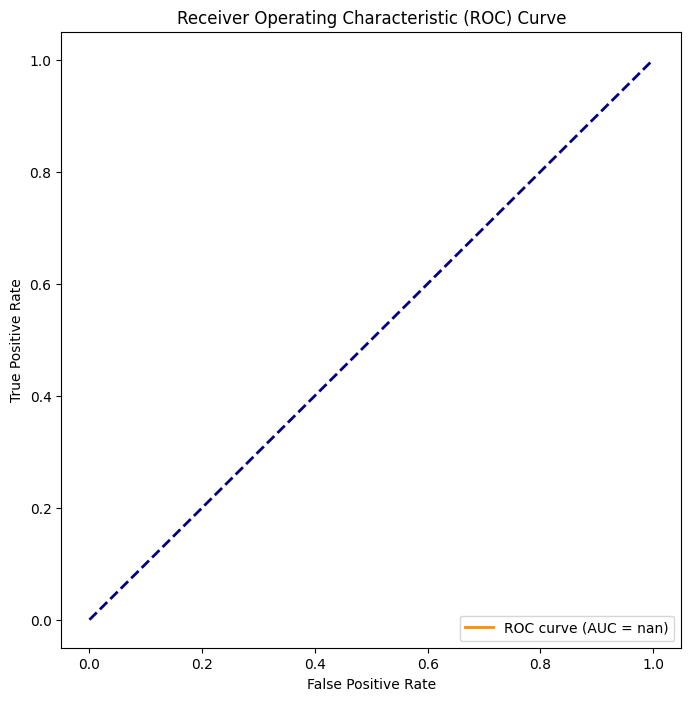

Optimal Threshold based on Youden's J: 2.00


In [266]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Assuming y_test_binary and y_pred_binary are your true labels and predicted labels
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Find the optimal threshold based on Youden's J statistic
youden_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[youden_index]
plt.scatter(fpr[youden_index], tpr[youden_index], marker='o', color='red', label=f'Youden\'s J Optimal Threshold = {optimal_threshold:.2f}')

# Display the plot
plt.show()

# Print the optimal threshold
print(f'Optimal Threshold based on Youden\'s J: {optimal_threshold:.2f}')


In [267]:
a = data24_new['constituency_number']
print(len(a))

1209


In [268]:
b = data24_new['predicted_outcome']

In [269]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'constituency_number' and 'predicted_outcome' with your actual column names

max_values = data24_new.groupby('constituency_number')['predicted_outcome'].max().reset_index()

# Print or use the result as needed
print(max_values)


     constituency_number  predicted_outcome
0                      0           1.050579
1                      1           1.083240
2                      2           1.086162
3                      3           1.091763
4                      4           1.092601
..                   ...                ...
261                  261           1.099282
262                  262           1.115699
263                  263           1.101190
264                  264           1.101472
265                  265           1.104481

[266 rows x 2 columns]


In [271]:
# Assuming combined_data is your DataFrame

# Inverse transform the padded sequences to text
decoded_texts = []
for index, row in combined_data.iterrows():
    sequence = row[['word_' + str(i) for i in range(1, max_sequence_length + 1)]].values
    non_zero_elements = sequence[sequence != 0]  # Remove padding (assumed 0 is used for padding)
    decoded_text = tokenizer.sequences_to_texts([non_zero_elements])[0]
    decoded_texts.append(decoded_text)

# Add a new column with decoded text to the DataFrame
combined_data['decoded_candidate_name'] = decoded_texts

# Print or use the DataFrame with decoded text
print(combined_data[['decoded_candidate_name']])


             decoded_candidate_name
0       molana abdul akbar chitrali
1                       abdul latif
2                       saleem khan
3                   iftikhar ud din
4                    eid ul hussain
...                             ...
4427                 <OOV> ur <OOV>
4428     malak muhammad asmat kakar
4429                 nazar muhammad
4430  abdul khaliq son of <OOV> jan
4431                    <OOV> kakar

[4432 rows x 1 columns]
